In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os, os.path, pickle, sys

from scipy import stats
import pymannkendall as mk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, Normalize
from matplotlib import cm
# plt.rc("font", family="Times")

from datetime import datetime

In [2]:
dpi_=600
fig_dir = "/Users/hn/Documents/00_GitHub/Ag_Others/presentations/ISLP/"

In [3]:
tick_legend_FontSize = 2
params = {"font.family": "Times",
          "legend.fontsize": tick_legend_FontSize * 1,
          "axes.labelsize": tick_legend_FontSize * 4,
          "axes.titlesize": tick_legend_FontSize * 2,
          "xtick.labelsize": tick_legend_FontSize * 4,
          "ytick.labelsize": tick_legend_FontSize * 4,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "xtick.labelbottom": True,
          "ytick.left": True,
          "ytick.labelleft": True,
          "axes.linewidth": 0.05}
plt.rcParams.update(params)

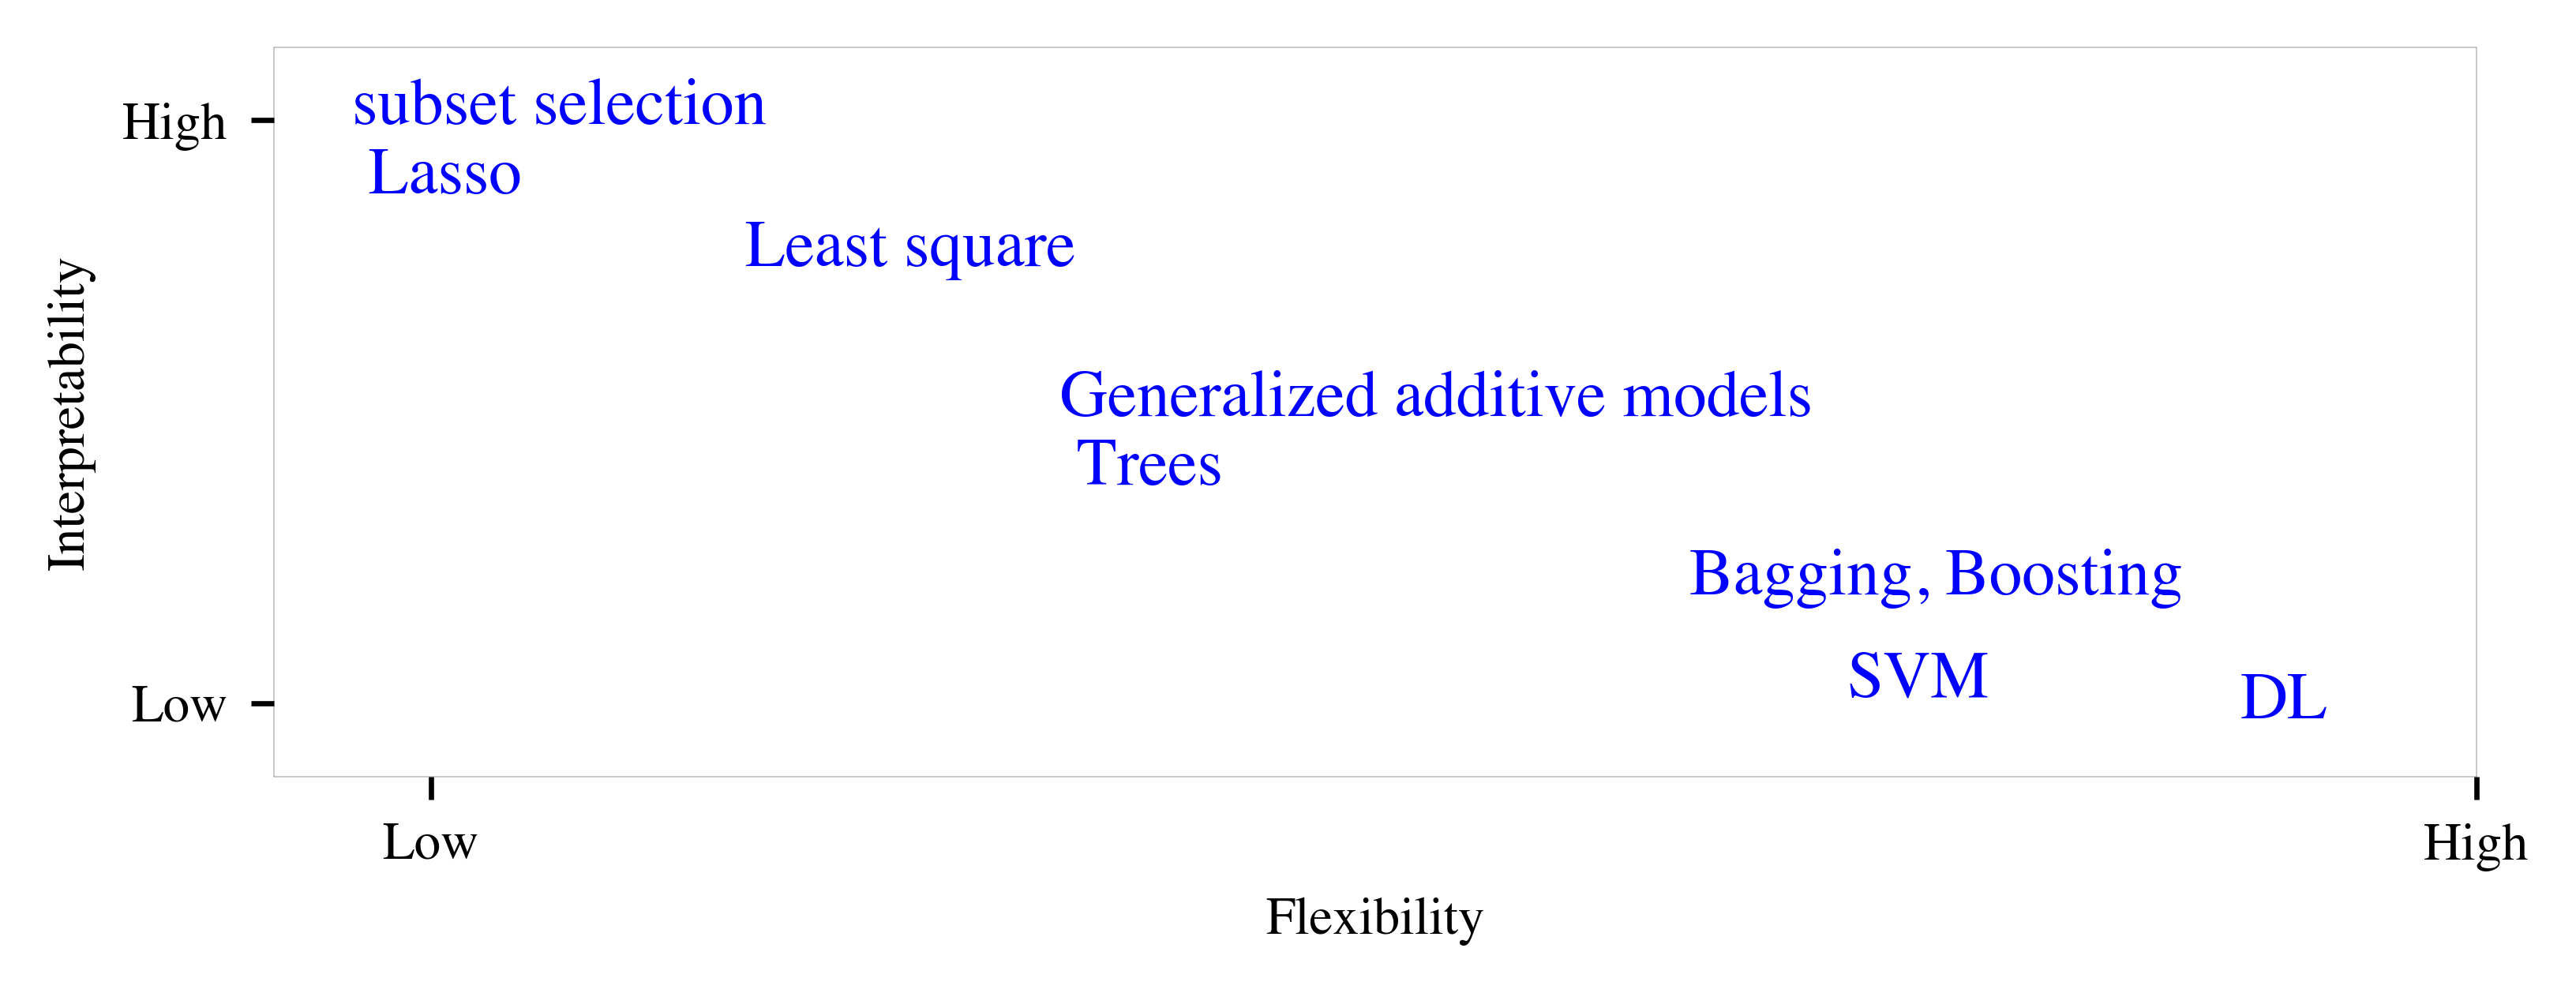

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(6, 2), sharex=True, 
                         gridspec_kw={"hspace": 0.25, "wspace": 0.05}, dpi=dpi_)
x_max = 13
plt.xlim(-1, x_max);
plt.ylim(-1, 9);
axes.set_xlabel("Flexibility"); axes.set_ylabel("Interpretability")

# fontdict={"fontsize": 15, "fontweight": "bold"}
axes.text(x=-0.5, y=7, s=f"subset selection\n Lasso", color="blue");
axes.text(x=2, y=6, s=f"Least square", color="blue");
axes.text(x=4, y=3, s=f"Generalized additive models\n Trees", color="blue");
axes.text(x=8, y=1.5, s=f"Bagging, Boosting", color="blue");
axes.text(x=9, y=.1, s=f"SVM", color="blue");
axes.text(x=11.5, y=-.2, s=f"DL", color="blue");

axes.set_xticks([0, x_max]); axes.set_xticklabels(['Low', 'High']);
axes.set_yticks([0, 8]); axes.set_yticklabels(['Low', 'High']);

fig_name = fig_dir + "model_flex_inter"
# plt.savefig(fig_name + ".pdf", bbox_inches="tight", dpi=600)

In [5]:
tick_legend_FontSize = 4
params = {"font.family": "Times",
          "legend.fontsize": tick_legend_FontSize * 1,
          "axes.labelsize": tick_legend_FontSize * 4,
          "axes.titlesize": tick_legend_FontSize * 4,
          "xtick.labelsize": tick_legend_FontSize * 4,
          "ytick.labelsize": tick_legend_FontSize * 4,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "xtick.labelbottom": True,
          "ytick.left": True,
          "ytick.labelleft": True,
          "axes.linewidth": 0.05}
plt.rcParams.update(params)

In [6]:
x_y_line = np.arange(-4, 5)

In [7]:
np.random.seed(1)
vec_size = 100
x = np.random.normal(size=vec_size)
y = x + np.random.normal(loc=0, scale=.1, size=vec_size)
# np. corrcoef (x, y)
x2 = np.random.normal(size=vec_size)
y2 = -(x2 + np.random.normal(loc=0, scale=.1, size=vec_size))

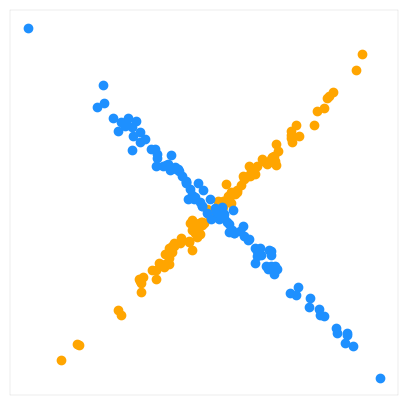

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=False)
# axes.grid(axis="y", which="both");
# axes.plot(x_y_line, x_y_line, label = "$y=x$")

axes.scatter(x, y, color="orange");
axes.scatter(x2, y2, color="dodgerblue");

axes.set_xticks([]); axes.set_yticks([]);

In [9]:
tick_legend_FontSize = 4
params = {"font.family": "Times",
          "legend.fontsize": tick_legend_FontSize * 4,
          "axes.labelsize": tick_legend_FontSize * 4,
          "axes.titlesize": tick_legend_FontSize * 4,
          "xtick.labelsize": tick_legend_FontSize * 4,
          "ytick.labelsize": tick_legend_FontSize * 4,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "xtick.labelbottom": True,
          "ytick.left": True,
          "ytick.labelleft": True,
          "axes.linewidth": 0.05}
plt.rcParams.update(params)

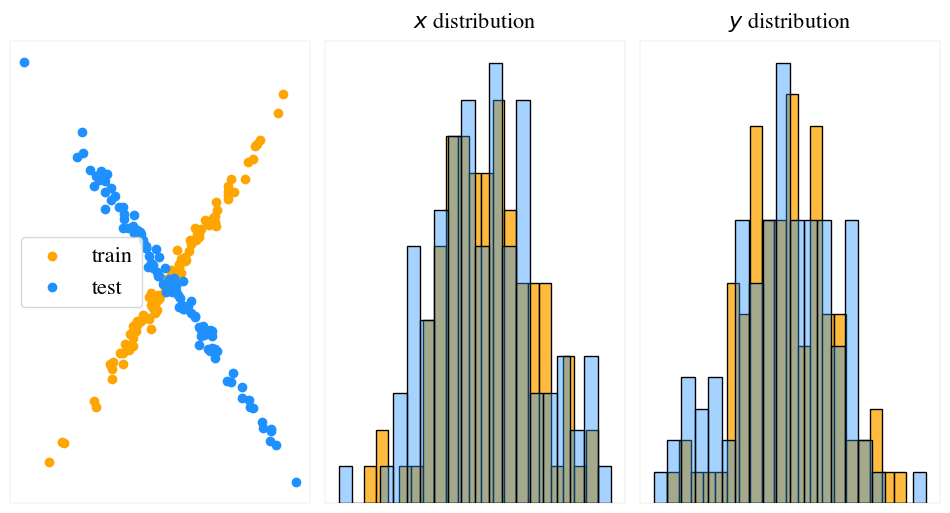

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharex=False, 
                        gridspec_kw={"hspace": 0.35, "wspace": 0.05})

axs[0].grid(axis="y", which="both"); axs[1].grid(axis="y", which="both"); axs[2].grid(axis="y", which="both")
axs[0].set_xticks([]); axs[0].set_yticks([]);
axs[1].set_xticks([]); axs[1].set_yticks([]);
axs[2].set_xticks([]); axs[2].set_yticks([]);


axs[0].scatter(x, y, color="orange", label="train");
axs[0].scatter(x2, y2, color="dodgerblue", label="test");
axs[0].legend(loc="best");

sns.histplot(data=x, ax=axs[1], color="orange",bins=20);
sns.histplot(data=x2, ax=axs[1], color="dodgerblue",bins=20, alpha=0.4);
axs[1].set_title('$x$ distribution');

sns.histplot(data=y, ax=axs[2], color="orange",bins=20);
sns.histplot(data=y2, ax=axs[2], color="dodgerblue",bins=20, alpha=0.4);
axs[2].set_title('$y$ distribution');

fig_name = fig_dir + "hist_comparition_one_at_a_time"
plt.savefig(fig_name + ".pdf", bbox_inches="tight", dpi=600)

In [11]:
#from scipy.stats import wasserstein_distance_nd
from scipy.stats import wasserstein_distance_nd
import scipy
import scipy.stats

dist1 = np.array([x, y])  
dist2 = np.array([x2, y2]) 
# Calculate 2D EMD
emd_distance = scipy.stats.wasserstein_distance_nd(dist1, dist2) 
round(emd_distance, 2)

13.35

In [12]:
a=[0.2, 0.3]; b=[0.1, 0.4]
a2=[0.1, 0.2]; b2=[0.3, 0.4]
dist1 = np.array([a, b])
dist2 = np.array([a2, b2])

# Calculate 2D EMD
print("Earth Mover's Distance dist1 and dist2:", round(wasserstein_distance_nd(dist1, dist2), 2))
print("Earth Mover's Distance dist2 and dist1:", round(wasserstein_distance_nd(dist1, dist2), 2))

Earth Mover's Distance dist1 and dist2: 0.17
Earth Mover's Distance dist2 and dist1: 0.17


In [13]:
from scipy.stats import entropy

# Define two 2D probability distributions
P = np.array([[0.2, 0.3], [0.1, 0.4]])  # First distribution
Q = np.array([[0.3, 0.2], [0.2, 0.3]])  # Second distribution

# Flatten the distributions
P = P.flatten()
Q = Q.flatten()

# Compute KL divergence
print("KL Divergence P and Q:", round(entropy(P, Q), 2))
print("KL Divergence Q and P:", round(entropy(Q, P), 2))

KL Divergence P and Q: 0.09
KL Divergence Q and P: 0.09


In [14]:
# Define two 2D probability distributions
P = np.array([[0.2, 0.3], [0.1, 0.4]])  # First distribution
Q = np.array([[0.3, 0.2], [0.2, 0.3]])  # Second distribution

# Flatten the distributions
P = P.flatten()
Q = Q.flatten()

# Compute KL divergence
kl_div = entropy(P, Q)  # Computes KL(P || Q)

print("KL Divergence:", round(kl_div, 2))

KL Divergence: 0.09


In [15]:
# Define two 2D probability distributions
P = np.array([x, y])   # First distribution
Q = np.array([x2, y2]) # Second distribution

# Flatten the distributions
P = P.flatten()
Q = Q.flatten()

# Compute KL divergence
kl_div = entropy(P, Q)  # Computes KL(P || Q)

print("KL Divergence:", round(kl_div, 2))

KL Divergence: inf


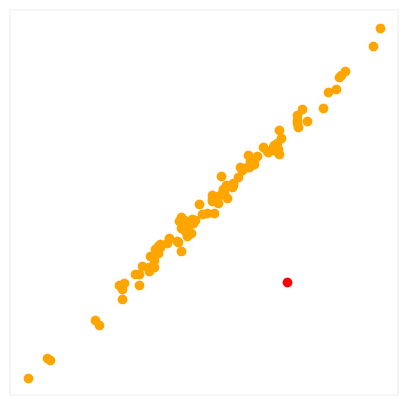

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=False)
# axes.grid(axis="y", which="both");
# axes.plot(x_y_line, x_y_line, label = "$y=x$")

axes.scatter(x, y, color="orange");
axes.scatter(1, -1, color="red");
axes.set_xticks([]); axes.set_yticks([]);

fig_name = fig_dir + "high_leverage_point"
plt.savefig(fig_name + ".pdf", bbox_inches="tight", dpi=600)

# Some definitions

**outlier** An outlier is a point for which $y_i$ is far from the value predicted by the model

**outlier** The training data contains outliers which are defined as observations that are far from the others.

**High leverage points** unusual $x$ value; "observations with high leverage have an unusual value for $x_i$"

In [17]:
tick_legend_FontSize = 3
params = {"font.family": "Times",
          "legend.fontsize": tick_legend_FontSize * 4,
          "axes.labelsize": tick_legend_FontSize * 4,
          "axes.titlesize": tick_legend_FontSize * 4,
          "xtick.labelsize": tick_legend_FontSize * 4,
          "ytick.labelsize": tick_legend_FontSize * 4,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "xtick.labelbottom": True,
          "ytick.left": True,
          "ytick.labelleft": True,
          "axes.linewidth": 0.05}
plt.rcParams.update(params)

In [18]:
from sklearn.covariance import EllipticEnvelope
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import OneClassSVM

estimators = {"Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
              "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(contamination=0.25),
              "OCSVM": OneClassSVM(nu=0.25, gamma=0.35)}

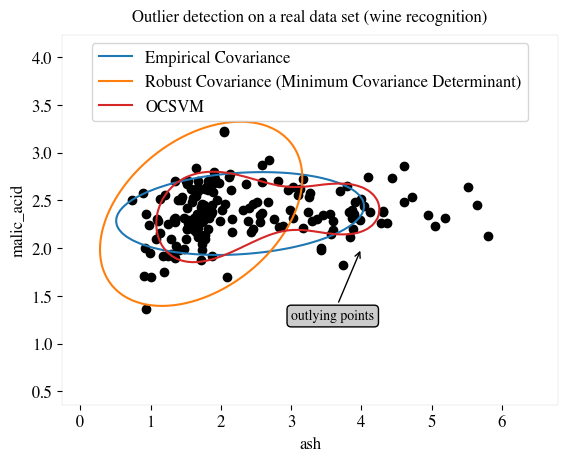

In [19]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

X = load_wine()["data"][:, [1, 2]]  # two clusters

fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:red"]
# Learn a frontier for outlier detection with several classifiers
legend_lines = []
for color, (name, estimator) in zip(colors, estimators.items()):
    estimator.fit(X)
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="decision_function",
        plot_method="contour",
        levels=[0],
        colors=color,
        ax=ax,
    )
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))


ax.scatter(X[:, 0], X[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
ax.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
ax.legend(handles=legend_lines, loc="upper center")
_ = ax.set(
    xlabel="ash",
    ylabel="malic_acid",
    title="Outlier detection on a real data set (wine recognition)",
)

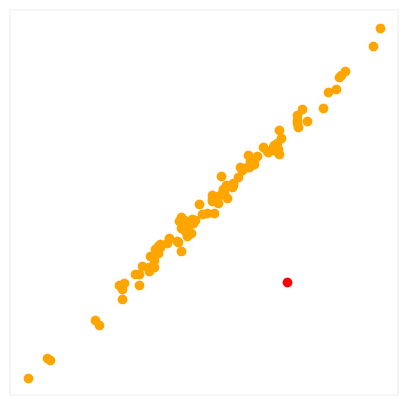

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=False)
# axes.grid(axis="y", which="both");
# axes.plot(x_y_line, x_y_line, label = "$y=x$")

axes.scatter(x, y, color="orange");
axes.scatter(1, -1, color="red");
axes.set_xticks([]); axes.set_yticks([]);

In [21]:
x = np.append(x, 1)
y = np.append(y, -1)

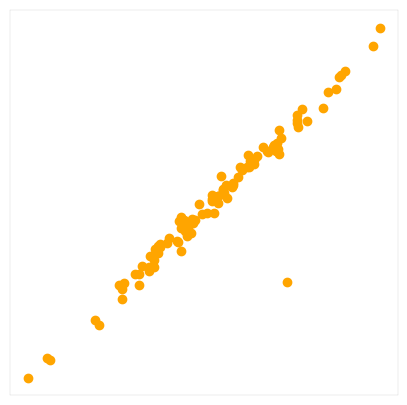

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=False)
# axes.grid(axis="y", which="both");
# axes.plot(x_y_line, x_y_line, label = "$y=x$")

axes.scatter(x, y, color="orange");
axes.set_xticks([]); axes.set_yticks([]);

In [23]:
xy_2D = np.column_stack((x, y))

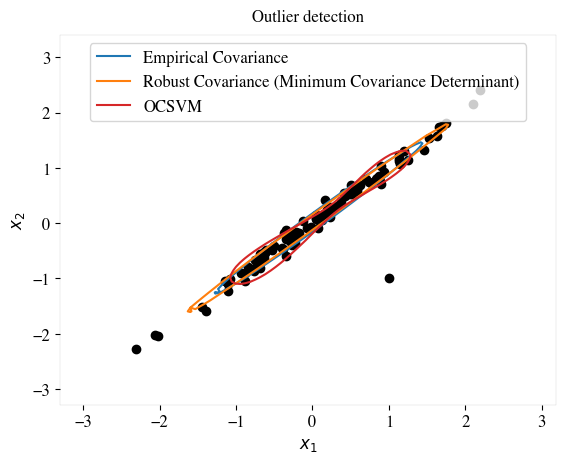

In [24]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:red"]
# Learn a frontier for outlier detection with several classifiers
legend_lines = []
for color, (name, estimator) in zip(colors, estimators.items()):
    estimator.fit(xy_2D)
    DecisionBoundaryDisplay.from_estimator(estimator,
                                           xy_2D,
                                           response_method="decision_function",
                                           plot_method="contour",
                                           levels=[0],
                                           colors=color,
                                           ax=ax)
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))


ax.scatter(xy_2D[:, 0], xy_2D[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

ax.legend(handles=legend_lines, loc="upper center")
_ = ax.set(xlabel="$x_1$",
           ylabel="$x_2$",
           title="Outlier detection")

### Anomaly detection using Isolation Forest 

In [25]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [28]:
# initialize and fit the model
clf = IsolationForest(contamination=0.1)
clf.fit(X_train)

# predict the anomalies in the data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

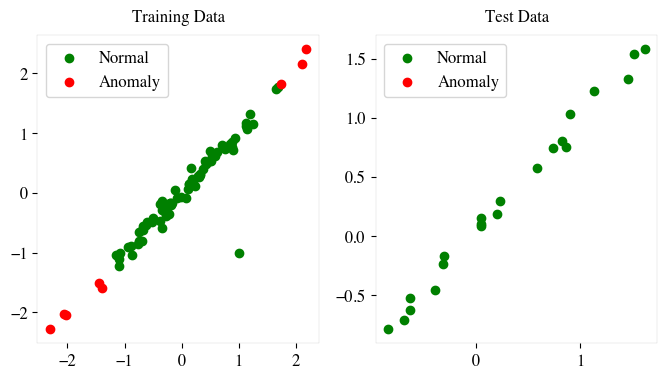

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(X_train[y_pred_train==1, 0], y_train[y_pred_train==1, 0], color='green', label='Normal');
axes[0].scatter(X_train[y_pred_train==-1, 0], y_train[y_pred_train==-1, 0], 
                color='red', label='Anomaly'); # , alpha=0.2
axes[0].set_title("Training Data");
axes[0].legend();

##
axes[1].scatter(X_test[y_pred_test==1, 0], y_test[y_pred_test==1, 0], color='green', label='Normal');
axes[1].scatter(X_test[y_pred_test==-1, 0], y_test[y_pred_test==-1, 0], color='red', label='Anomaly');
axes[1].set_title("Test Data");
axes[1].legend();

In [30]:
# initialize and fit the model
clf = IsolationForest(contamination=0.1)
clf.fit(x.reshape(-1,1))

# predict the anomalies in the data
y_pred_train = clf.predict(x.reshape(-1,1))
# y_pred_test = clf.predict(X_test)

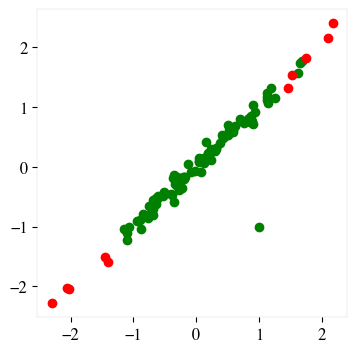

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.scatter(x[y_pred_train==1], y[y_pred_train==1], color='green', label='Normal');
axes.scatter(x[y_pred_train==-1], y[y_pred_train==-1], color='red', label='Anomaly'); # , alpha=0.2

# axes.legend();

## LocalOutlierFactor

In [32]:
from sklearn.neighbors import LocalOutlierFactor

# Sample data (replace with your actual data)
data = np.array([[1, 1], [1.5, 1.5], [5, 5], [8, 8], [1, 1.2], [5.5, 5.5], [1, 1.1], [9, 8], [10, 10]])

# Create LOF model
lof = LocalOutlierFactor(n_neighbors=3, contamination='auto')

# Fit the model and predict outliers
y_pred = lof.fit_predict(data)

# Get outlier scores
lof_scores = lof.negative_outlier_factor_

# Identify outliers (values less than 0)
outliers = data[y_pred == -1]

# Print results
print("Outlier Predictions:", y_pred)
print("LOF Scores:", lof_scores)
print("Outliers:\n", outliers)

Outlier Predictions: [ 1  1 -1  1  1  1  1  1  1]
LOF Scores: [-0.96873254 -0.96873254 -2.98217064 -1.09277026 -1.05237411 -0.9007862
 -1.01378305 -1.01981523 -1.01981523]
Outliers:
 [[5. 5.]]


In [33]:
# Create LOF model
lof = LocalOutlierFactor(n_neighbors=3, contamination='auto')

# Fit the model and predict outliers
y_pred = lof.fit_predict(xy_2D)

# Get outlier scores
lof_scores = lof.negative_outlier_factor_

# Identify outliers (values less than 0)
outliers = xy_2D[y_pred == -1]

# Print results
# print("Outlier Predictions:", y_pred)
# print("LOF Scores:", lof_scores)
# print("Outliers:\n", outliers)

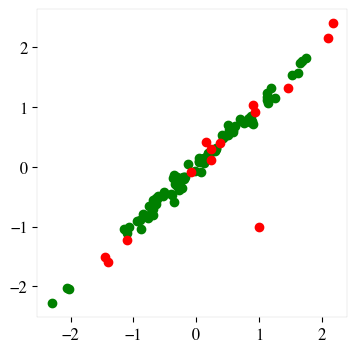

In [34]:
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.scatter(x[y_pred==1], y[y_pred==1], color='green', label='Normal');
axes.scatter(x[y_pred==-1], y[y_pred==-1], color='red', label='Anomaly'); # , alpha=0.2